CNN LSTM is an LSTM architecture specifically designed for sequence prediction problems with spatial inputs, like images or videos.

In [ ]:
import tensorflow as tf
#physical_devices = tf.config.list_physical_devices('GPU') 
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.list_physical_devices(device_type=None)
import tensorflow.keras
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from keras import callbacks 
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import Dense,TimeDistributed,Conv3D,Conv2D, MaxPooling2D,Dropout,Flatten,Bidirectional,LSTM,BatchNormalization,MaxPooling3D,ConvLSTM2D

# Load data

In [ ]:
#use the same dataset 
#loading data--------------------------------------------------------------------------------------
img=np.load('DNNtrain32_new1.npy')
lb=np.load('DNNtrain_label32_new1.npy')

print('The shape of trainset image is ',img.shape)
print('The shape of trainset label is ',lb.shape)


The shape of trainset image is  (23750, 32, 32, 3)
The shape of trainset label is  (23750, 1024)


In [ ]:
test_img=np.load('DNNtest32_new1.npy')
test_lb=np.load('DNNtest_label32_new1.npy')

print('The shape of testset image is ',test_img.shape)
print('The shape of testset label is ',test_lb.shape)

The shape of testset image is  (5950, 32, 32, 3)
The shape of testset label is  (5950, 1024)


# CNN LSTM


In [ ]:
img = img.reshape((img.shape[0],1,32,32,3))
test_img=test_img.reshape((test_img.shape[0],1,32,32,3))

In [ ]:
model=Sequential()
model.add(TimeDistributed(Conv2D(filters=16, kernel_size=(3,3), activation='relu'),input_shape=(1,32,32,3)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
model.add(TimeDistributed(Conv2D(filters=8, kernel_size=(3,3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(100,return_sequences=False,activation='relu'))
model.add(Dense(100))
model.add(Dense(32*32))
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['MeanSquaredError'])


In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_77 (TimeDis (None, 1, 30, 30, 16)     448       
_________________________________________________________________
time_distributed_78 (TimeDis (None, 1, 15, 15, 16)     0         
_________________________________________________________________
time_distributed_79 (TimeDis (None, 1, 13, 13, 8)      1160      
_________________________________________________________________
time_distributed_80 (TimeDis (None, 1, 6, 6, 8)        0         
_________________________________________________________________
time_distributed_81 (TimeDis (None, 1, 288)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 100)               155600    
_________________________________________________________________
dense_32 (Dense)             (None, 100)             

In [ ]:
#train the model------------------------------------------------------------------------------------------ 
#earlystopping to find the optimal number of epochs 
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",
                                        mode ="min", patience = 25,restore_best_weights = True,
                                        verbose=1) 
eps=2000
bsize=8

model.fit(img,lb, batch_size=bsize,epochs=eps,validation_split=0.1,callbacks=[earlystopping])

Epoch 1/2000
2672/2672 [==============================] - 15s 6ms/step - loss: 4.7938 - mean_squared_error: 4.7938 - val_loss: 4.3830 - val_mean_squared_error: 4.3830
Epoch 2/2000
2672/2672 [==============================] - 15s 6ms/step - loss: 4.2263 - mean_squared_error: 4.2263 - val_loss: 4.5607 - val_mean_squared_error: 4.5607
Epoch 3/2000
2672/2672 [==============================] - 14s 5ms/step - loss: 4.1714 - mean_squared_error: 4.1714 - val_loss: 4.0980 - val_mean_squared_error: 4.0980
Epoch 4/2000
2672/2672 [==============================] - 15s 5ms/step - loss: 4.1389 - mean_squared_error: 4.1389 - val_loss: 4.0175 - val_mean_squared_error: 4.0175
Epoch 5/2000
2672/2672 [==============================] - 15s 5ms/step - loss: 4.1033 - mean_squared_error: 4.1033 - val_loss: 4.0050 - val_mean_squared_error: 4.0050
Epoch 6/2000
2672/2672 [==============================] - 15s 5ms/step - loss: 4.0919 - mean_squared_error: 4.0919 - val_loss: 4.0493 - val_mean_squared_error: 4.049

In [ ]:
#evaluate on testset
eval=model.evaluate(test_img, test_lb)
print('The test MSE is',eval[1])

186/186 [==============================] - 1s 5ms/step - loss: 4.3509 - mean_squared_error: 4.3509
The test MSE is 4.3509321212768555


# Plot a sample prediction and the corresponding ground truth


Text(0.5, 1.0, 'Ground Truth')

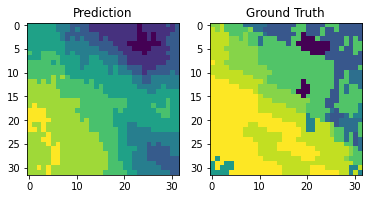

In [ ]:
predictions=model.predict(test_img)
assert predictions.shape==test_lb.shape
#predicted value
sample=np.round(predictions[120]).reshape(32,32)

#Plot the corresponding label  of the testset
ground_truth=test_lb[120].reshape(32,32)

fig, ax = plt.subplots(1,2)
ax[0].imshow(sample);
ax[0].set_title('Prediction')
ax[1].imshow(ground_truth);
ax[1].set_title('Ground Truth')

# Model structure

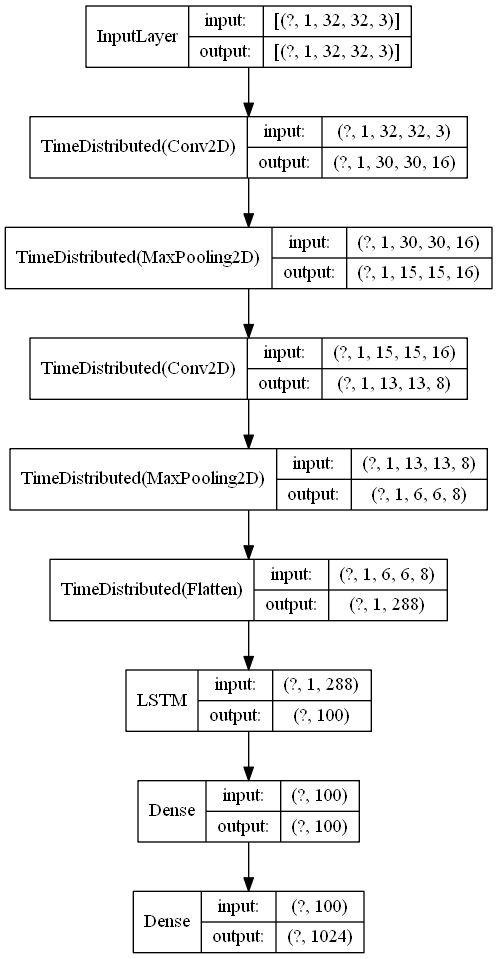

In [ ]:
tf.keras.utils.plot_model(model,
                          show_shapes=True,
                          show_layer_names=False, 
                          rankdir='TB', expand_nested=True)